In [2]:
%matplotlib inline
from IPython.core.display import HTML, display
HTML("<style>.container { width:100% !important; }</style>")

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import pandas as pd
import numpy as np
# import emoji lists from data.sentiment_dict
from Data.sentiment_dict import positive, negative
from sklearn.feature_extraction import DictVectorizer
pd.options.display.max_colwidth=250
pd.options.display.max_columns=999

In [4]:
# separate tweet into parts with emojis of interest and the rest
def separate_emoji(tweet, emojis):
    text = tweet[:]
    emojis_exist=set()
    for i in emojis:
        if i in text:
            text = text.replace(i,'')
            emojis_exist.add(i)
    return text, dict.fromkeys(emojis_exist,1)

In [5]:
# specify the location of the tweets
negtweet_file ='./Data/positive.txt'
postweet_file ='./Data/negative.txt'

In [6]:
positive=[ 
            ':-)',':)',':o)',':]',':c)',':D','C:',   # JF, MS removed :3 because of confusion with times
            u'\u263A',  # JF
            u'\U0001F600',  # JF
            u'\U0001F601',  # JF
            u'\U0001F602',  # JF
            u'\U0001F603',  # JF
            u'\U0001F604',  # JF
            u'\U0001F606',  # JF
            u'\U0001F60A',  # JF
            u'\U0001F60B',  # JF
            u'\U0001F60D',  # JF
            u'\U0001F60E',  # JF
            u'\U0001F607',  # JF
            u'\U0001F617',  # JF
            u'\U0001F618',  # JF
            u'\U0001F642',  # JF
            u'\U0001F638',  # JF
         ]
negative =[
            ':-(',':(',':c',':[','D8','D;','D=','DX','v.v',  # JF
            u"\u2639",  # JF
            u'\U0001F613',  # JF
            u'\U0001F614',  # JF
            u'\U0001F615',  # JF
            u'\U0001F616',  # JF
            u'\U0001F621',  # JF
            u'\U0001F622',  # JF
            u'\U0001F623',  # JF
            u'\U0001F624',  # JF
            u'\U0001F625',  # JF
            u'\U0001F626',  # JF
            u'\U0001F627',  # JF
            u'\U0001F628',  # JF
            u'\U0001F629',  # JF
            u'\U0001F62D',  # MS
            u'\U0001F630',  # JF
            u'\U0001F631',  # JF
            u'\U0001F641',  # JF
            ]


In [7]:
cnt = 0
with open('Data/clean_data.txt','w') as out_file:
    with open(negtweet_file,'r') as f:
        for line in f:
            if len(line.split('|'))==2:
                out_file.write(line)
    with open(postweet_file,'r') as f:
        for line in f:
            if len(line.split('|'))==2:
                out_file.write(line)

In [8]:
tweet_df=[]
with open('Data/clean_data.txt','r') as f:
    for line in f:
        if len(line.split('|'))==2:
            tweet_df.append(line.split('|'))

In [9]:
tweet_df=pd.DataFrame(tweet_df, columns=['id','tweet'])
tweet_df.index=tweet_df.id
tweet_df=tweet_df[['tweet']]

In [10]:
tweet_text_emoji=tweet_df.tweet.map(lambda x:separate_emoji(x.decode('utf-8'), positive+negative))

In [11]:
tweet_df['tweet_text'] = tweet_text_emoji.map(lambda x:x[0])

In [12]:
tweet_df['tweet_emoji'] = tweet_text_emoji.map(lambda x:x[1])

In [15]:
import pickle
with open('./Data/tweet_2016_03_21.pkl','wb') as f:
    pickle.dump(tweet_df,f)

In [19]:
with open('./Data/tweet_2016_03_21.pkl','rb') as f:
    df = pickle.load(f)

In [20]:
df.head()

tweet  \
id                                                                                                                                     
698750876014546944  Happiness is :D :D When you are the reason of someone's happiness. All the darians have checked in at 8.00... \n   
698750888576466944                                                                                                    thanks baby😘\n   
698750913771483137                                                                              you guys are something else lmao😂😂\n   
698750913771671552                                         Thx for the follow Craig Carpenter! Looking forward to your tweets. :) \n   
698750917965778946                                                        Chicken sandwich with huancaína sauce and goat cheese :)\n   

                                                                                                                      tweet_text  \
id                                                                                                                                 
698750876014546944  Happiness is   When you are the reason of someone's happiness. All the darians have checked in at 8.00... \n   
698750888576466944                                                                                                 thanks baby\n   
698750913771483137                                                                            you guys are something else lmao\n   
698750913771671552                                       Thx for the follow Craig Carpenter! Looking forward to your tweets.  \n   
698750917965778946                                                      Chicken sandwich with huancaína sauce and goat cheese \n   

                   tweet_emoji  
id                              
698750876014546944  {u':D': 1}  
698750888576466944   {u'😘': 1}  
698750913771483137   {u'😂': 1}  
698750913771671552  {u':)': 1}  
698750917965778946  {u':)': 1}

In [ ]:
DV=DictVectorizer()
emoji_df=DV.fit_transform(emoji_df) # this is actually a vector, or matrix, not a df
emoji_list = {}
for i in DV.feature_names_:
    emoji_list[i.encode('raw_unicode_escape')] = i
emoji_list=pd.DataFrame(emoji_list, index=[0])
emoji_list = emoji_list[[i.encode('raw_unicode_escape') for i in DV.feature_names_]]
emoji_df=pd.DataFrame(emoji_df.toarray(), columns=[i.encode('raw_unicode_escape') for i in DV.feature_names_])

In [5]:
DV=DictVectorizer()
emoji_df=DV.fit_transform(emoji_df) # this is actually a vector, or matrix, not a df
emoji_list = {}
for i in DV.feature_names_:
    emoji_list[i.encode('raw_unicode_escape')] = i
emoji_list=pd.DataFrame(emoji_list, index=[0])
emoji_list = emoji_list[[i.encode('raw_unicode_escape') for i in DV.feature_names_]]
emoji_df=pd.DataFrame(emoji_df.toarray(), columns=[i.encode('raw_unicode_escape') for i in DV.feature_names_])

In [6]:
positive_columns = [i.encode('raw_unicode_escape') for i in positive]
negative_columns = [i.encode('raw_unicode_escape') for i in negative]

In [7]:
emoji_list

\u2639 \u263a \U0001f600 \U0001f601 \U0001f602 \U0001f603 \U0001f604  \
0      ☹      ☺          😀          😁          😂          😃          😄   

  \U0001f606 \U0001f607 \U0001f60a    ...     \U0001f626 \U0001f627  \
0          😆          😇          😊    ...              😦          😧   

  \U0001f628 \U0001f629 \U0001f62d \U0001f630 \U0001f631 \U0001f638  \
0          😨          😩          😭          😰          😱          😸   

  \U0001f641 \U0001f642  
0          🙁          🙂  

[1 rows x 34 columns]

In [168]:
display(tweet_df.head(10))

tweet
0                                                                      bro that's so depressing.. Let's go to his house 🙄\n
1                                                        thank you thank you for telling me about them omg i love them ❤x\n
2  Excellent day at work, laughed all day. Blessed to do my job. #crewlife #averybritishairline #post2276gettingthere 👏🏻 \n
3                                                                                               Things are getting there \n
4                                                I'm so proud of you! Welcome to the team!! #BellLetsTalk #SickNotWeak   \n
5                                                                                   please follow me  #BellLetsTalk   X18\n
6                                                                                                           thanks girl 💕\n
7                                                                                                    2 weeks from today  \n
8                                                                                        's snapchats cheer me up so much\n
9                                                                                          I'm not sure if I'm going yet \n

In [9]:
# combine tweet_df with emoji_df
tweet_with_emoji_df = tweet_df.copy()
tweet_with_emoji_df[emoji_df.columns] = emoji_df.copy()
tweet_with_emoji_df['label'] = tweet_with_emoji_df[positive_columns].sum(axis=1).map(lambda x: x>=1)

In [10]:
from sklearn.cross_validation import train_test_split
(train_data, test_data) = train_test_split(tweet_with_emoji_df,random_state=0)

In [11]:
data_samples = train_data.tweet.values
# data_samples=np.hstack((train_data.tweet.values, test_data.tweet.values))
# data_samples = tweet_with_emoji_df.tweet.values

In [12]:
# tweet_with_emoji_df.head()
# test_data.shape


In [38]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [14]:
n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()



In [15]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, #max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features for NMF...
done in 0.627s.


In [16]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with tf-idf features,"
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Extracting tf features for LDA...
done in 0.611s.
Fitting the NMF model with tf-idf features,n_samples=2000 and n_features=1000...
done in 2.119s.

Topics in NMF model:
Topic #0:
love follow laurenfollowspree baby bellletstalk hi facetimemenash omg hey girl make lauren life amp video dream song ya new babe
Topic #1:
miss man really baby guys friend boyfriend days come brother home gonna hope babe gone amp having soon bae bestfriend
Topic #2:
know don like feel think really right shit need time let amp lol people wanna follow new make watch got
Topic #3:
thank god babe boo aw baby haha awesome girl omg awh youuu rt following youuuu oh hope beautiful aww lt
Topic #4:
happy birthday hope make great makes baby enjoy best bday follow amazing babe year bless girl pretty im time wish
Topic #5:
day today sleep great hope work valentine bad tomorrow going ve long sad nice really amp school bed ll new
Topic #6:
thanks follow boo girl following lol man lot rt babe ily hi haha connect hey great oh

In [204]:
# 1-gram with tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, 
                                   max_features=n_features,
                                   stop_words='english',
                                   ngram_range=(1, 6))

train_vect = tfidf_vectorizer.fit_transform(train_data.tweet.values)
test_vect = tfidf_vectorizer.transform(test_data.tweet.values)

In [220]:
np.savez_compressed("train_data.npz", I = train_vect, O = train_data.label)

In [110]:
#use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

clf = LogisticRegression(C=1, penalty='l2')
clf.fit(train_vect, train_data.label)
roc_auc_score(test_data.label,clf.predict_proba(test_vect)[:,1])

0.7243795917624043

In [87]:
# roc curve
def plot_roc_curve(label, score):
    fpr, tpr, _ = roc_curve(label, score)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(label,score))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


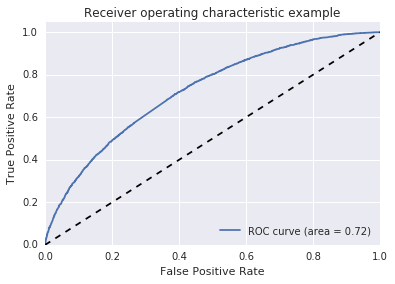

In [88]:
plot_roc_curve(test_data.label,clf.predict_proba(test_vect)[:,1])

In [97]:
# grid search
from sklearn.grid_search import GridSearchCV
clf = Pipeline([('tf_idf', TfidfVectorizer()),
               ('model',LogisticRegression())])

params = dict(tf_idf__max_df=[0.95, 0.85],
             tf_idf__min_df=[2,5],
             tf_idf__max_features=[None, n_features],
             tf_idf__stop_words=['english', None],
             tf_idf__ngram_range=[(1,1),(1,3),(1,6)],
             model__C=[0.5,1,2])
grid_search = GridSearchCV(clf, param_grid=params,verbose=1,n_jobs=-1)

grid_search.fit(train_data.tweet.values, train_data.label)

[Parallel(n_jobs=-1)]: Done  49 tasks       | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 199 tasks       | elapsed:  8.3min


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 18.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('tf_idf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=Tr...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'model__C': [0.5, 1, 2], 'tf_idf__ngram_range': [(1, 1), (1, 3), (1, 6)], 'tf_idf__max_features': [None, 1000], 'tf_idf__max_df': [0.95, 0.85], 'tf_idf__stop_words': ['english', None], 'tf_idf__min_df': [2, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [111]:
grid_search.best_params_

{'model__C': 2,
 'tf_idf__max_df': 0.95,
 'tf_idf__max_features': None,
 'tf_idf__min_df': 2,
 'tf_idf__ngram_range': (1, 3),
 'tf_idf__stop_words': None}

In [112]:
print(roc_auc_score(test_data.label, grid_search.predict_proba(test_data.tweet)[:,1]))

0.750104010573


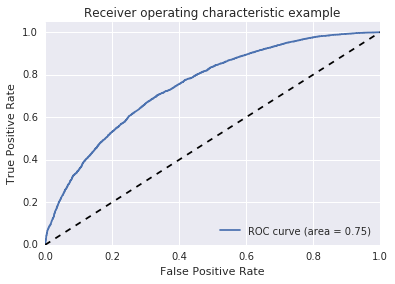

In [198]:
clf = Pipeline([('tf_idf', TfidfVectorizer()),
               ('model',LogisticRegression())])

clf.set_params(**grid_search.best_params_)
clf.fit(train_data.tweet.values, train_data.label)
plot_roc_curve(test_data.label, clf.predict_proba(test_data.tweet)[:,1])

In [179]:
print(sum(test_data.label == clf.predict(test_data.tweet))*1.0/len(test_data))

0.6824


In [187]:
test_data['pred'] = clf.predict(test_data.tweet)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [69]:
test_data[['tweet', 'pred', 'label']] 

In [196]:
test_data[['tweet','pred','label']].groupby(['label','pred']).count()

tweet
label pred        
False False   5498
      True    1542
True  False   2428
      True    3032

In [199]:
n_gram_weight = pd.DataFrame()
b=clf.named_steps['tf_idf']
n_gram_weight['n_gram']=(map(lambda x: x[1],sorted(map(lambda x: (b.vocabulary_[x], x), b.vocabulary_))))
n_gram_weight['weight']=(clf.named_steps['model'].coef_.T[:,0])

In [200]:
pd.options.display.max_rows=999

In [203]:
Top_N = 100
print('TOP %d Negative words' % Top_N)
n_gram_weight.sort_values(by='weight').head(Top_N)

TOP 100 Negative words


n_gram    weight
27441           miss -6.367459
49697           wish -5.423958
35643            sad -5.338546
27566        missing -4.403532
43944          tired -4.242952
37196           sick -4.107634
17521           hate -3.737570
25765             lt -3.713666
47366           want -3.676667
52430           zayn -3.575492
19765          hurts -3.495047
18281       headache -3.440940
19714         hungry -3.438158
39729          sucks -3.360596
11754             dx -3.295688
37527         sleepy -3.196282
35356            rip -3.060201
29463           need -3.056996
6405           bored -2.997403
8745            cold -2.844115
13128           feel -2.821987
27545         missed -2.820511
19743           hurt -2.723344
27478        miss my -2.680867
19384       horrible -2.607251
39392        stomach -2.590421
37447          sleep -2.567054
32845           pain -2.563807
12037      emotional -2.521749
50306          worst -2.504409
46273  unfortunately -2.487799
49284            why -2.485088
7668        can find -2.483946
38137         so sad -2.472025
28156          music -2.463703
21579            isn -2.454149
33416    pillow talk -2.394454
24000           left -2.371925
10617   disappointed -2.361996
39134       starving -2.358516
48712        what to -2.324880
35884           save -2.309528
9                 01 -2.267606
46548          upset -2.261914
50240        working -2.237580
6896             but -2.223761
9425         craving -2.203372
34474         rapper -2.173747
3679         are you -2.155938
47273          wanna -2.155915
32501           ouch -2.123733
20066            ill -2.092471
19759        hurting -2.083772
17511           hasn -2.064685
17923          haven -2.062463
3365         anymore -2.041417
46152            ugh -2.033341
48737     what wrong -2.016656
23709           last -2.016574
35577           rude -2.012940
25975        make it -1.988232
4623             bad -1.986193
50160           work -1.978447
7535          camera -1.969672
23269           kill -1.963675
40457       terrible -1.952927
45895        tuesday -1.952106
33985       pregnant -1.932503
35693          sadly -1.925401
38719          sorry -1.922833
18353          heart -1.922186
12668      exhausted -1.912130
11196       don like -1.908493
27564         missin -1.907479
31834          on my -1.893137
39517         stream -1.890658
9413          cramps -1.886691
49778        wishing -1.881119
10447           didn -1.873232
6603           brave -1.870938
48773       whatsapp -1.862058
22974     just wanna -1.859227
49032          where -1.857341
35304      right now -1.848543
17428          harsh -1.847169
37238           sigh -1.838530
33596         please -1.829433
10436        did you -1.807183
38222       so tired -1.800146
6172          bitter -1.777859
5727         believe -1.770647
4328            away -1.767752
33421     pillowtalk -1.751860
29513       need new -1.747501
33044            pdx -1.746875
22984      just want -1.745664
10620  disappointing -1.744119
49308        why can -1.738809
19121             ho -1.736347
20990      irritated -1.732652

In [202]:
print('TOP %d Positive words' % Top_N)
n_gram_weight.sort_values(by='weight', ascending=False).head(Top_N)

TOP 20 Positive words


n_gram    weight
48053             wcw  3.776379
14961           funny  3.727921
24985            lmao  3.663118
23794           laugh  3.572267
30022           nigga  3.461507
23040           kanye  3.330243
12804  facetimemenash  3.160573
50922             you  3.134933
2075            amber  3.120014
30060          niggas  3.080018
25073             lol  3.035590
23811        laughing  2.948277
12632         excited  2.797261
29291             nah  2.516510
25734          loving  2.500514
48283            weak  2.499585
25026           lmfao  2.474792
3970              ass  2.469133
17059          hahaha  2.463350
5807             best  2.452106

In [ ]:
# 1-gram with tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                                   stop_words='english',ngram_range=(1, 6))

train_vect = tfidf_vectorizer.fit_transform(train_data.tweet.values)
test_vect = tfidf_vectorizer.transform(test_data.tweet.values)

In [21]:
# 1-gram with NO tf-idf
train_vect = tf_vectorizer.fit_transform(train_data.tweet.values)
test_vect = tf_vectorizer.transform(test_data.tweet.values)

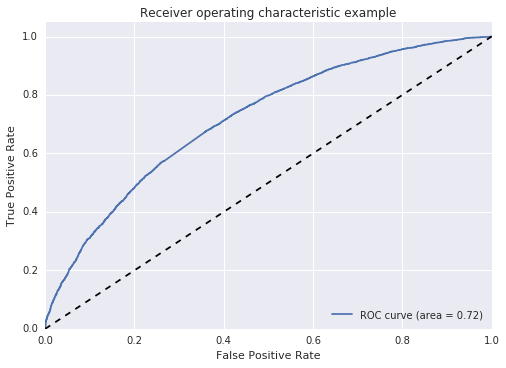

In [22]:
clf = LogisticRegression(C=0.1, penalty='l2')
clf.fit(train_vect, train_data.label)
plot_roc_curve(test_data.label,clf.predict_proba(test_vect)[:,1])

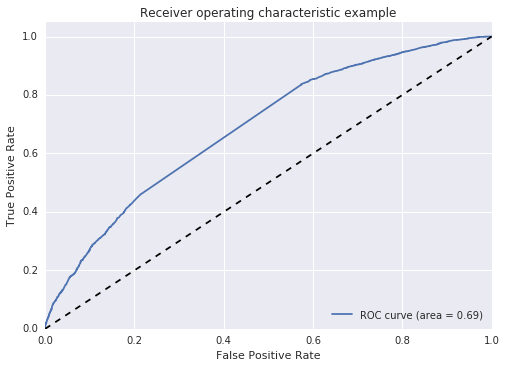

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import sklearn
clf = Pipeline([('k_best',sklearn.feature_selection.SelectKBest(k=1000)),
        ('clf',RandomForestClassifier(n_estimators=1000, max_depth=5))])
clf.fit(train_vect, train_data.label)
plot_roc_curve(test_data.label,clf.predict_proba(test_vect)[:,1])

In [24]:
# after LDA -> Logistic
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                                stop_words='english')
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,
                                random_state=0)

train_vect = tf_vectorizer.fit_transform(train_data.tweet.values)
train_lda = lda.fit_transform(train_vect)
test_vect = tf_vectorizer.fit_transform(test_data.tweet.values)
test_lda = lda.fit_transform(test_vect)


In [28]:
clf = LogisticRegression(C=1, penalty='l2')
clf.fit(train_lda, train_data.label)
roc_auc_score(test_data.label,clf.predict_proba(test_lda)[:,1])
# plot_roc_curve(test_data.label,clf.predict_proba(test_lda)[:,1])

0.51597833156426909

In [45]:
# after LDA -> Logistic
n_topics = 50
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, #max_features=n_features,
                                   stop_words='english')
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5)

train_vect = tfidf_vectorizer.fit_transform(train_data.tweet.values)
train_nmf = nmf.fit_transform(train_vect)
test_vect = tfidf_vectorizer.fit_transform(test_data.tweet.values)
test_nmf = nmf.fit_transform(test_vect)


In [46]:
clf = LogisticRegression(C=0.1, penalty='l1')
clf.fit(train_nmf, train_data.label)
roc_auc_score(test_data.label,clf.predict_proba(test_nmf)[:,1])


0.54658613521894772

In [ ]:
print('a')